# **Exploring Top Restaurants in Las Vegas: A Data Science Journey!**



## **Background:**
As we gear up for our summer trip to Las Vegas, we've decided to delve into the city's vibrant dining scene. To ensure we experience the best and most budget-friendly eateries, we've utilized the [Yelp dataset](https://business.yelp.com/data/resources/open-dataset/) to identify top-rated restaurants in Las Vegas. We've also filtered out the top 50 fast-food chains to avoid the usual options and embrace more unique culinary experiences.​

### **Project Goal/Stakes:**
Our objective is to analyze the Yelp dataset to pinpoint exceptional yet affordable dining establishments in Las Vegas. By focusing on local favorites and hidden gems, we aim to curate a list of restaurants that offer both quality and value, ensuring our trip is both delicious and economical.​

### **Project Submission:**
A Note from your Backpacking Partner:

"Hello, team. I've gathered and preprocessed the Yelp dataset for Las Vegas, filtering out the top 50 fast-food chains to ensure we explore the city's unique culinary offerings. Now, it's up to you to analyze this data and find the best budget-friendly restaurants for our trip. I request that you do NOT delete/modify any part of the question description, given code, and pre-loaded comments in the code block.

We look forward to your insightful analyses and recommendations for our culinary adventure in Las Vegas! Hope we can have a wonderful trip in Vegas."


Just a reminder, for a better a smooth autograder experience, please:
- Write your answers between <font color='green'>`# ANSWER STARTING HERE`</font> and <font color='green'>`# ANSWER ENDS HERE`</font>.
- Do not delete helper cells
- Always use `seed=42` as your `random_state` in the whole notebook.

Submit this Google Colab/Jupyter Notebook file on Gradescope. Cheers!🥂


### **Part A (4 Pts Total)**

#### You are expected to load the Yelp data and provide some metrics so I know what we are working with. Follow these steps.

##### ***1.1 Import Libraries (0 pt)***

---


Many libraries are imported for you. Import the additional **Sci-kit learn**  modules:
- **Decision Tree Classifier**
- **K Neighbors Classifier**
- **Logistic Regression**
- **Random Forest Classifier**

In [ ]:
# Necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score

import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize

from matplotlib.colors import Normalize
from matplotlib.lines import Line2D

import ast
pd.set_option('display.max_columns', None)
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
import seaborn as sns
import warnings # To suppress some warnings
import plotly.graph_objects as go
import plotly.express as px

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Add the classifiers to the imports here:
# ANSWER STARTING HERE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# ANSWER ENDS HERE


##### ***1.2 Understanding the Dataset (1 pt)***

---


1. Load the dataset to a dataframe named `yelp_data`.
2. Print the dimensions of the dataset.
3. Print the column names of the dataframe.

In [ ]:
# Load the yelp dataset
# ANSWER STARTING HERE
yelp_data = pd.read_csv('yelp_datasets.csv')
print(yelp_data.shape)
print(yelp_data.columns.tolist())
# ANSWER ENDS HERE

(21318, 16)
['business_id', 'name', 'city', 'state', 'latitude', 'longitude', 'business_stars', 'review_count', 'categories', 'checkins', 'review_id', 'user_id', 'reviewer_stars', 'useful', 'funny', 'cool']


In [ ]:
yelp_data.head()

##### ***1.3 Explore the Data (3 pts)***

---


Let's see what is stored in the dataset first to get a feel for what we can expect. Write only a **single line** of code for each.
1. Print the number of **samples** in the dataset (a numerical value).
2. Print the number of **features** in the dataset (a numerical value)
3. **Create two lists of the unique business names and categories**, named `names` and `categories`, respectively. (data type: **list**)
Your answer should be similar to:
- Business: ["Emeril's New Orleans Fish House", "Mr. Lucky's 24-7", 'Jean Philippe' ...]
- Categories: ['Seafood', 'American (New)', 'Restaurants', 'American (Traditional)', ...]


In [ ]:
# Print the number of samples
# ANSWER STARTING HERE
print("Number of samples:", yelp_data.shape[0])

# ANSWER ENDS HERE

# Print the number of features
# ANSWER STARTING HERE

print("Number of features:", yelp_data.shape[1])

# ANSWER ENDS HERE

# Write code to get your two lists.
# ANSWER STARTING HERE

# Extract and collect unique types
names = yelp_data['name'].unique()

categories =yelp_data['categories'].unique()

# ANSWER ENDS HERE

print("Business:", names)
print(len(names))
print("Categories:", categories)
print(len(categories))


Number of samples: 21318
Number of features: 16
Business: ["Emeril's New Orleans Fish House" "Mr. Lucky's 24-7"
 'Jean Philippe Patisserie' ... '7th & Carson'
 "Benny's Smokin BBQ and Brews" 'Ciao Ciao Cafe & Bar']
1474
Categories: ['Seafood;American (New);Restaurants'
 'Restaurants;American (Traditional);Diners'
 'Specialty Food;Chocolatiers & Shops;Food;Desserts;Restaurants;Bakeries'
 ... 'Tapas Bars;American (New);Restaurants'
 'Food;Nightlife;Restaurants;Barbeque;Beer;Wine & Spirits;American (New);Bars'
 'Cafes;Restaurants']
1425


### **Part B (9 Pts Total)**

#### Now we need to do some scraping of the dataset so you can feed it into the training model.

##### ***2.1 Preprocessing (3 pts)***

---
Before training the model, we need to clean and prepare the data. Please do the following.
1. Print the number of missing data in each column. Please specify which column name you got the number from. You can create a **dictionary** `missing_data`.
2. Impute missing values in the `yelp_data` dataset by filling them with zeros. Save the processed data as `yelp_data`.

In [ ]:
# Print the number of missing data in each column.
# ANSWER STARTING HERE
missing_data = {}
for col in yelp_data.columns.tolist():
  missing_data[col] = int(yelp_data[col].isna().sum())
print(missing_data)

# ANSWER ENDS HERE


# ANSWER STARTING HERE

yelp_data = yelp_data.fillna(0)


# ANSWER ENDS HERE


{'business_id': 0, 'name': 0, 'city': 0, 'state': 0, 'latitude': 0, 'longitude': 0, 'business_stars': 0, 'review_count': 0, 'categories': 0, 'checkins': 0, 'review_id': 0, 'user_id': 0, 'reviewer_stars': 13, 'useful': 12, 'funny': 13, 'cool': 0}


##### ***2.2 Splitting, Training, and Testing (6 pts)***

---

Typically in machine learning, we wish to split the data into various portions in order to let a machine learning model train itself on one part of the data and test itself on another part of the data. Splitting also helps prevent overfitting, ensuring the model can make accurate predictions on new, unseen data.

Training data is used to learn the model, while testing data assesses its generalization to unseen examples. I would recommend using **80%** of the data  for training and **20%** for testing.

Before we split the data, we are going to help you process the raw data a little bit more:
 1. We prefer restaurants close to Canyon Gate in Las Vegas, near our AirBnb.
 2. We add a `preference_rating` column at the end of the dataframe, so that we can predict the rating classification.
 3. We add non-linearity to `preference_rating`

In [ ]:
# Helper Function, Do Not Remove
import numpy as np
import pandas as pd
import hashlib
from sklearn.preprocessing import MinMaxScaler

def business_id_to_float(business_id):
    hash_object = hashlib.md5(business_id.encode())
    hash_hex = hash_object.hexdigest()
    hash_int = int(hash_hex[:8], 16)
    return hash_int / (2**32 - 1)

def float_to_business_id(unique_float, original_business_ids):
    id_to_float = {id: business_id_to_float(id) for id in original_business_ids}
    closest_id = min(id_to_float.keys(), key=lambda x: abs(id_to_float[x] - unique_float))
    return closest_id

# Non-linear transformation functions
def apply_non_linear_transformation(x, steepness=2):
    """
    Apply a sigmoid-like non-linear transformation
    - Increases sensitivity around mid-range values
    - Compresses extreme values
    """
    return 1 / (1 + np.exp(-steepness * (x - 0.5))) * 8

def exponential_boost(x, base=1.5):
    """
    Apply exponential boosting to favor higher values
    """
    return np.power(x, base)

def angular_score_adjustment(x):
    """
    Use trigonometric function to add non-linear variation
    """
    return np.sin(np.pi * x / 1.5) * 2

# Define weights
weights = {
    'location_score': 0.15,
    'business_stars': 0.35,
    'reviewer_stars': 0.35,
    'engagement_score': 0.15
}

# Define the target location as Canyon Gate, Las Vegas
target_location = (36.1433, -115.2821)

# Haversine distance calculation
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2)**2
    return 2 * R * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

# Main processing function
def generate_preference_rating(yelp_data):
    # Calculate distance from target location
    yelp_data['distance_km'] = yelp_data.apply(
        lambda row: haversine(target_location[0], target_location[1],
                               row['latitude'], row['longitude']), axis=1
    )

    # Normalize distance to [0, 1] and invert (closer is better)
    scaler = MinMaxScaler()
    yelp_data['location_score'] = 1 - scaler.fit_transform(yelp_data[['distance_km']])

    # Normalize business_stars and reviewer_stars to [0, 1]
    yelp_data['business_stars_norm'] = yelp_data['business_stars'] / 5
    yelp_data['reviewer_stars_norm'] = yelp_data['reviewer_stars'] / 5

    # Calculate engagement_score and normalize
    yelp_data['engagement_score_raw'] = yelp_data['useful'] + yelp_data['funny'] + yelp_data['cool']
    yelp_data['engagement_score'] = scaler.fit_transform(yelp_data[['engagement_score_raw']])

    # Calculate preference_rating with non-linear transformations
    yelp_data['preference_rating'] = (
        weights['location_score'] * apply_non_linear_transformation(yelp_data['location_score']) +
        weights['business_stars'] * exponential_boost(yelp_data['business_stars_norm']) +
        weights['reviewer_stars'] * angular_score_adjustment(yelp_data['reviewer_stars_norm']) +
        weights['engagement_score'] * np.log1p(yelp_data['engagement_score'])
    )

    # Normalize the preference_rating to 1-10 scale
    rating_scaler = MinMaxScaler(feature_range=(1, 10))
    yelp_data['preference_rating'] = rating_scaler.fit_transform(
        yelp_data[['preference_rating']]
    ).round().astype(int)

    # Convert business_id to float
    yelp_data['business_id'] = yelp_data['business_id'].apply(business_id_to_float)

    return yelp_data

# Data preparation and display
def prepare_final_ranking(yelp_data):
    # Remove duplicates, keeping highest-rated business for each name
    unique_data = yelp_data.sort_values(by='preference_rating', ascending=False).drop_duplicates(subset='name', keep='first')

    # Create ranked dataframe
    ranked_yelp = unique_data[['name', 'preference_rating']].sort_values(by='preference_rating', ascending=False)

    return ranked_yelp

# Process the data
yelp_data = generate_preference_rating(yelp_data)

# Prepare and display ranking
ranked_results = prepare_final_ranking(yelp_data)
print(ranked_results)


                          name  preference_rating
15475      Eatt Gourmet Bistro                 10
2420       La Maison de Maggie                 10
1937     Papa Pinny's Pizzeria                 10
17725                Pan Asian                 10
18171         Patisserie Manon                 10
...                        ...                ...
15806  The Lodge at Shelbourne                  3
14441                   Magura                  3
11240         The Lodge Tenaya                  3
9418                  Rosati's                  3
19785      360 Gourmet Burrito                  2

[1474 rows x 2 columns]


Using every feature as input to the training process is not a good idea. Some features are not related to business rating, so let's exclude them from our feature set. Let the criteria for a good resturant be a rating greater than **eight**.

1. Extract the following for the input data `X`: `business_stars`,`review_count`,`checkins`,`reviewer_stars`,`useful`,`funny`, and `cool`.
2. Store this binary classification variable in `Y`.


In [ ]:
# Initialize X and Y
# ANSWER STARTING HERE
X = yelp_data[['business_stars', 'review_count', 'checkins', 'reviewer_stars', 'useful', 'funny', 'cool']]
Y = yelp_data['preference_rating'].apply(lambda x: True if x > 8.0 else False)

print(X.head())
print(Y.head())
# ANSWER ENDS HERE


   business_stars  review_count  checkins  reviewer_stars  useful  funny  cool
0             3.5           943      13.0             2.0     1.0    0.0     0
1             3.5           802       7.0             3.0     0.0    0.0     0
2             4.0          1301      62.0             3.0     1.0    0.0     0
3             3.5          5950     673.0             1.0     0.0    0.0     0
4             2.5           159       1.0             3.0     2.0    1.0     2
0    False
1    False
2    False
3    False
4    False
Name: preference_rating, dtype: bool


3. Use [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from the Scikit-learn module to split the training data using the proposed 80/20 ratio.

In [ ]:
seed = 42 # always use this seed number as your random_state in the whole notebook
test_size=0.2

# Split your training data and use the seed to get consistent results.
# ANSWER STARTING HERE

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# ANSWER ENDS HERE
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17054, 7)
(4264, 7)
(17054,)
(4264,)


4. **Normalize** both the training and test sets so that the model is trained on features with a consistent scale. **You can use any scaler from the Scikit-learn module to do this.** If we don't normalize the data, the model may struggle to converge during training because some features could dominate the loss function due to their larger scale. By normalizing the data, we ensure that each feature contributes equally to the learning process, improving the model's ability to find an optimal solution. (eg. [StandardScaler documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html))

In [ ]:
#You can add more than 1 scalar. This is the base code.
# ANSWER STARTING HERE
scaler_train = StandardScaler()
scaler_train.fit(X_train)

X_train_scaled = scaler_train.transform(X_train)
X_test_scaled = scaler_train.transform(X_test)
# ANSWER ENDS HERE


### **Part C (15 Pts Total)**

#### This is going to be the main source of evaluation for the return offer. Be thorough with your model search. You will train a **Logistic Regression** Model, plus 3 different classifiers: **KNN**, **DecisionTree**, **Logistic Regression** (with maximum 1000 iterations) and **Random Forest**.

##### ***3.1 Load Models (4 pts)***

---

1. Create a python dictionary named `models` that maps the names of the models to their constructors.

In [ ]:
# Initialize the models
# ANSWER STARTING HERE
models = {
   "KNN" : KNeighborsClassifier(),
    "DecisionTree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "Logistic Regression" : LogisticRegression(max_iter=1000)
         }

# ANSWER ENDS HERE



##### ***3.2 K-fold Cross-Validation (8 pts)***
Using the standardized feature sets, do the following:
1. Given five folds and the object with the specified number of splits, perform **k-folds cross-validation** for **each** model using StratifiedKFold.
2. Print the **name** of the model and **cross validation accuracy** (mean and standard deviation) for each.

[Cross Validation Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [ ]:
# Perform k-fold Cross-Validation for each model
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=seed)

for model_name, model in models.items():
    np.random.seed(42)
    print(f"Model: {model_name}")
    # ANSWER STARTING HERE
    cv_scores = cross_val_score(model, X, Y, cv=skf)
    print(f"Cross-validated Accuracy: {cv_scores.mean()} (+/- {cv_scores.std()})")
   # ANSWER ENDS HERE


Model: KNN
Cross-validated Accuracy: 0.9432872366129604 (+/- 0.002603830049548118)
Model: DecisionTree
Cross-validated Accuracy: 0.9664601908564421 (+/- 0.0029416402416948054)
Model: Random Forest
Cross-validated Accuracy: 0.9545921668143222 (+/- 0.0034161555774162382)
Model: Logistic Regression
Cross-validated Accuracy: 0.9326390658482453 (+/- 0.0006382837838236419)


##### ***3.3 Question: What is the most accurate ML model from above choice? Why? (3 pts)***
The most accurate ML model from above is Decision Trees because it has the highest mean, meaning it has the highest average accurary on unseen data. It is the most accurate because it is good at being able to generalize non-linear data. It also provides clear interpretability.


### **Part D (12 Pts Total)**
#### We wants you to deploy of all the models to production. Evaluate all of the models on the heldout test set.

##### ***4.1 Model Evaluation (6 pts)***

---


For each of the models do the following in order to evaluate each of them properly:
- **Train** each of the models
- Print each of the **accuracies** (3 decimal precision) of the models by their **names** in this format: *Accuracy of (model name): (accuracy of the model)*.
- Print a **classification report** with the accuracy, precision, recall and f1-score of each model.

In [ ]:
t_models = []
i = 0
# Train each model using the training data
for model_name, model in models.items():
    # Set random seed for reproducibility
    np.random.seed(42)

    # ANSWER STARTING HERE
    m = model
    m.fit(X_train, y_train)
    t_models.append(m)

    # ANSWER ENDS HERE

# Evaluate the performance of each model
for model_name, model in models.items():
    np.random.seed(42)

    # ANSWER STARTING HERE
    m = t_models[i]
    y_pred = m.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model_name}: {accuracy:.3f}") # Your accuracy table header here
    print(classification_report(y_test, y_pred)) # Implement your classification report here
    i += 1
    # ANSWER ENDS HERE


Accuracy of KNN: 0.943
              precision    recall  f1-score   support

       False       0.96      0.98      0.97      3974
        True       0.61      0.43      0.51       290

    accuracy                           0.94      4264
   macro avg       0.79      0.71      0.74      4264
weighted avg       0.94      0.94      0.94      4264

Accuracy of DecisionTree: 0.964
              precision    recall  f1-score   support

       False       0.98      0.98      0.98      3974
        True       0.73      0.74      0.74       290

    accuracy                           0.96      4264
   macro avg       0.86      0.86      0.86      4264
weighted avg       0.96      0.96      0.96      4264

Accuracy of Random Forest: 0.949
              precision    recall  f1-score   support

       False       0.96      0.98      0.97      3974
        True       0.69      0.47      0.56       290

    accuracy                           0.95      4264
   macro avg       0.83      0.73      0

##### ***4.2 Model Interpretation (6 pts)***

---

- **Interpret** the results of the classification models (list the models which got the best scores for Accuracy, Precision, Recall and F1 score).
- **Recommend the best model according to your analysis.** Hopefully your best model has over a 90% accuracy as this will guarantee your return offer.

**Question: Which model according to your analysis was the best at predicting the Resturant Preference Rating? Why? DO NOT just say that the accuracy is better than the rest of the models. That is obvious.**

The model that has the best score for accuracy was Decision Tree, meaning that it had the highest number of correct predictions out of all total predictions. The model that got the best score for precision when predicting good resturant preference ratings was Decision Trees. The model that got the best score for precision when predicting bad resturant preference ratings was also Decision Trees. The model that got the best score for recall when predicting good resturant preference ratings was Decision Trees. The model that got the best score for recall when predicting bad resturant preference ratings was Logistic Regression. Decision Trees also had the best f1-score for both predicting good and bad resturant preference ratings. Based on my analysis Decision Trees seems to be the best in all the catergories, therefore I recommend it.

### **Part E (5 Pts Total)**

#### Seeing all the effort and hard work, it looks as if most people have done well with this project🎉! With all the input features you have used, there is still no concrete way of figuring out whether a feature is more important than another. We only really used intuition for that. Thus, we shall do some feature engineering to determine this.

##### ***5.1 What are your top 4 features used to predict Our restaurant preference rating (5 pts)?***
- Use Decision Tree to create a dataframe for **feature importance** named **feature_importance_df**.
- **Extract**, **Sort**, and **Print** the **top 4** features from that dataframe.

Here are some references to help you:

[Feature Importance 1](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)

[Feature Importance 2](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_)



In [ ]:
# Extract the feature importances from the most accurate model
# ANSWER STARTING HERE
dt_mod = DecisionTreeClassifier(random_state=seed)
dt_mod.fit(X_train, y_train)
importances =  dt_mod.feature_importances_
# Creating a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Displaying feature importances
print("Feature Importances:")
print(feature_importance_df[:4])

# ANSWER ENDS HERE


Feature Importances:
          Feature  Importance
1    review_count    0.602031
2        checkins    0.130326
3  reviewer_stars    0.105590
0  business_stars    0.065582


### Part F (14 Points Total)

Now you'll learn about clustering techniques! You'll perform data preprocessing, apply dimensionality reduction technique, and use K-means clustering to analyze the data. Finally, you'll visualize the results.



We wish to standardize the feature sets in order to make sure that the PCA is not biased by differences in scales within the data. Standardization aids with consistency in the data.

##### ***6.1.1 Normalize the data using StandardScaler. (1 pts)***

- **Standardize** the features `X` and save it as `X_scaled`. (Include only the feature columns not the label column)

*Hint:* [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
X = yelp_data[['business_id', 'business_stars', 'review_count', 'checkins', 'reviewer_stars', 'useful', 'funny', 'cool']]


# TODO: Normalize the data using StandardScaler
# ANSWER STARTING HERE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ANSWER ENDS HERE


There are varying reasons for using a dimensionality reduction step such as PCA prior to data segmentation. By reducing the number of features, we are improving the performance of our algorithm. In addition, by decreasing the number of features the noise is also reduced.

**PCA**

Principal Component Analysis (PCA) is a dimensionality reduction technique that finds directions (principal components) maximizing variance in a dataset. It's an orthogonal linear transformation mapping data to a new coordinate system [1].

PCA steps for a dataset $X$ with $n$ samples and $p$ features:

1. Center the data.
2. Compute covariance matrix $\Sigma = \frac{1}{n-1}X^TX$.
3. Calculate eigenvectors and eigenvalues of $\Sigma$.
4. Sort eigenvectors by descending eigenvalues.
5. Select top $k$ eigenvectors as new basis.

Project original data onto this new basis for transformed data.

PCA is simple and effective for linear relationships but may not suit complex, non-linear structures [2].

For more in-depth reading on PCA:

[1] Scikit-learn PCA documentation: [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

[2] Jolliffe, I. T. (2002). Principal Component Analysis, Second Edition. Springer Series in Statistics.


##### ***6.1.2 Use a PCA function to return the transformed data. (3 pts)***

- Complete the PCA Implementation Function
- Apply Principal Component Analysis to Reduce Dimensionality
- Iteratively adjust the number of components `n_components` to retain at least 80% of the variance
- Save the resulting components for the elements in our data set as `X_pca`

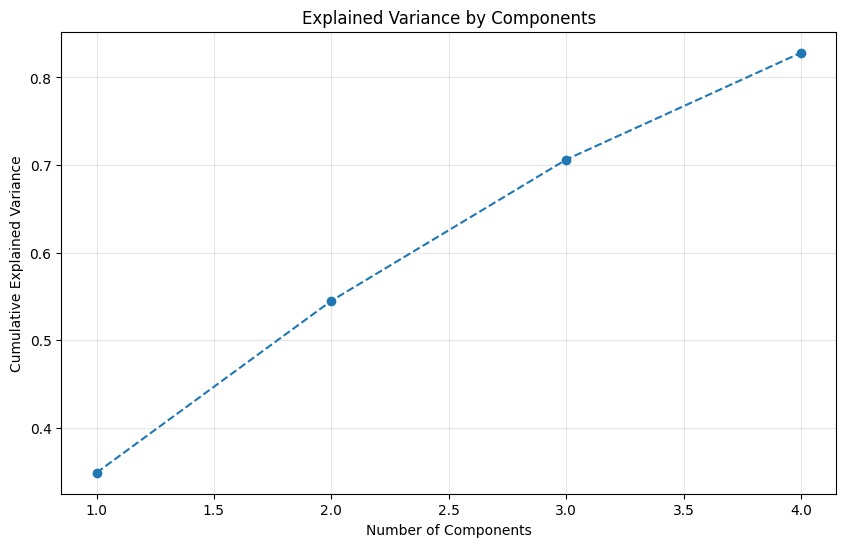

(21318, 4)
[0.34858963 0.19627698 0.16126539 0.12203854]


In [ ]:
# TODO: Apply PCA and return the transformed data

def apply_pca(X_scaled, n_components):
    # ANSWER STARTING HERE
    pca = PCA(n_components = n_components, random_state=seed)
    X_pca = pca.fit_transform(X_scaled)
    # ANSWER ENDS HERE
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
    plt.title('Explained Variance by Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True, alpha=0.3)
    plt.show()

    return pca, X_pca
    # Apply PCA
n_components = 4
pca, X_pca = apply_pca(X_scaled, n_components)
print(X_pca.shape)
print(pca.explained_variance_ratio_)


##### ***6.2.1 Elbow Method (2.5 pts)***

In K-Means clustering, we start by randomly initializing k clusters and iteratively adjusting these clusters until they stabilize at an equilibrium point. However, before we can do this, we need to decide how many clusters (k) we should use.

In this part, you will determine the optimal number of clusters for a given dataset using the **Elbow Method**. The goal is to identify the point where adding more clusters results in minimal improvement in clustering quality, known as the "elbow point."

The *distortion* for a given number of clusters $k$ can be represented as:



$$D(k) = \frac{1}{N} \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2$$

Where:
- $D(k)$ is the distortion for $k$ clusters
- $k$ is the number of clusters
- $C_i$ represents the $i$-th cluster
- $x$ is each data point in the cluster
- $\mu_i$ is the centroid (mean) of the $i$-th cluster
- $\|\cdot\|$ denotes the Euclidean distance


Task A: Implement your **own distortion function** to determine the different numbers of clusters, ranging from 1 to 9.

- Store your mean distortion values in:
  - A list named **distortions** (one value per $k$)
  - A dictionary named **mapping** with keys as $k$ values and values as their corresponding mean distortions

- Create an elbow plot with $k$ on the x-axis and mean distortion on the y-axis

- Visually identify the elbow point (the optimal value of $k$)


Use X_pca that we calculated in the previous parts for this part.
**(WARNING: You can't use the `KMeans.inertia_`)**

1 : 1.9902036923673712
2 : 1.7638949925694962
3 : 1.7387699918764608
4 : 1.4885931945428141
5 : 1.3249385418549626
6 : 1.264002241061811
7 : 1.2366008179813868
8 : 1.1532665603686751
9 : 1.099998455462263


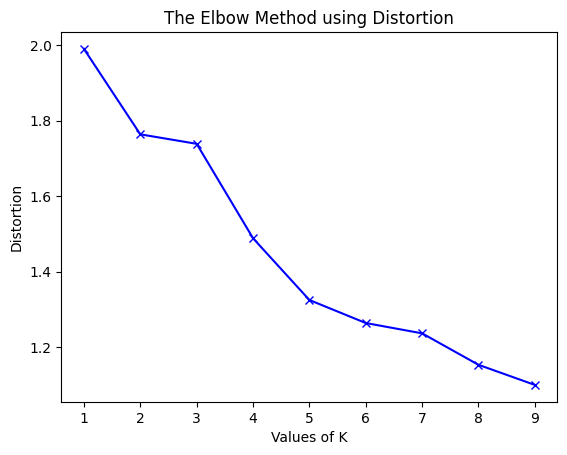

In [ ]:
distortions = []
K = range(1, 10)
mapping = {}
for k in K:
# ANSWER STARTING HERE
  seed = 42
  km = KMeans(n_clusters=k, random_state=seed)
  km.fit(X_pca)
  m = cdist(X_pca, km.cluster_centers_, 'euclidean')
  dmin = m.min(axis=1)
  dk = dmin.mean()
  mapping[k] = dk
  distortions.append(dk)
# ANSWER ENDS HERE

for key, val in mapping.items():
    print(f'{key} : {val}')


plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


##### ***6.2.2 KElbowVisualizer (2.5 pts)***
Task B: Use the `KElbowVisualizer` from the `yellowbrick` library to verify the conclusion above. See [Elbow Method
](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html), and [here](https://www.scikit-yb.org/en/latest/quickstart.html) to install yellowbrick.

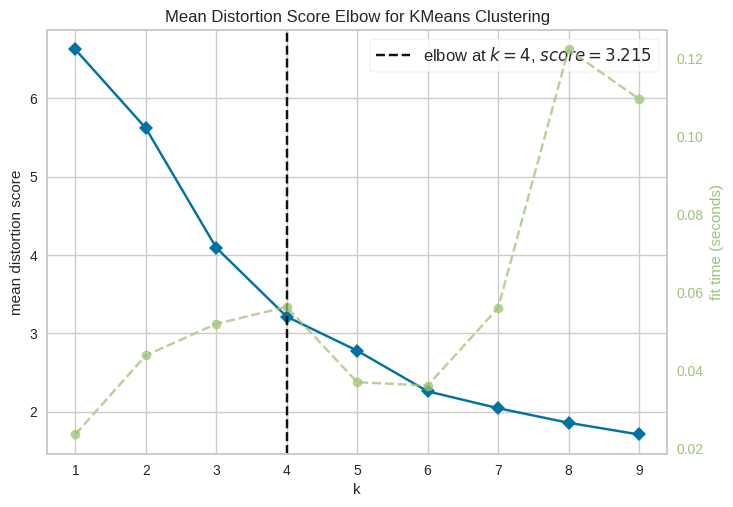

<Axes: title={'center': 'Mean Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='mean distortion score'>

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
import yellowbrick.cluster.elbow as elbow_module
from yellowbrick.cluster.elbow import distortion_score

def mean_distortion_score(X, labels, metric="euclidean"):
    """Compute the mean distortion (average squared distance to centroids)"""
    total_distortion = distortion_score(X, labels, metric)
    return total_distortion / X.shape[0]

elbow_module.KELBOW_SCOREMAP['distortion'] = mean_distortion_score


# ANSWER STARTING HERE
# Load the dataset
X_yellowbrick = X_pca

# Instantiate the clustering model and visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X_yellowbrick)
visualizer.show()

# ANSWER ENDS HERE


To determine the optimal number of clusters, we have to select the value of $k$ at the “elbow”, i.e. the point after which the distortion starts decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 4.


In [ ]:
k_cluster = 4

##### ***6.2.3 Question: According to the plots above, why do you think we chose K=4? (1 pts) What distortion value do the last two plots show, and what does it indicate about the clustering? (1 pts)***

I think we chose K=4 because it is at this point that there are no major drop in decrease anymore and the mean starts to not have as many major changes. The distoration value when k=4 is about 3.2 which means that there is high compactness among clusters. The last two plots have distortion values of about 1.8 and 1.5 which means that there is very high compactness, if you keep on increasing k you are increasing your chances of overfitting.

**K-Means Clustering**

K-Means is a popular unsupervised learning algorithm used for clustering, where the goal is to partition data into K clusters based on feature similarity. The algorithm works by iteratively assigning data points to the nearest centroid (cluster center) and updating centroids to minimize the variance within each cluster. It starts by randomly initializing centroids and repeats the process until the centroids stabilize (convergence). K-Means is efficient for large datasets but sensitive to the choice of K and initial centroids. In your homework, you'll implement K-Means to explore how well it groups your data based on similarity!







##### ***6.4 Apply K-means clustering and return the cluster labels (3 pts)***


In [ ]:
# TODO: Apply K-means clustering and return the cluster labels
def apply_kmeans(X, n_clusters, random_state=seed):
    # ANSWER STARTING HERE
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed)
    kmeans.fit(X)
    labels = kmeans.labels_
    # ANSWER ENDS HERE
    return labels

# Apply K-means to both PCA results
pca_labels = apply_kmeans(X_pca, n_clusters = k_cluster)
pca_labels.shape

(21318,)

Visualize your clustering!

In [22]:
## Step 6: Visualization

def visualize_3d_plotly_interactive(X_pca, pca_labels):
    """Fully interactive 3D visualization with Plotly using pre-computed labels"""

    k_cluster = len(np.unique(pca_labels))

    # Create the plot
    fig = go.Figure()

    # Add cluster points
    colors = px.colors.qualitative.Set1[:k_cluster]
    for i in range(k_cluster):
        cluster_mask = pca_labels == i
        fig.add_trace(go.Scatter3d(
            x=X_pca[cluster_mask, 0],
            y=X_pca[cluster_mask, 1],
            z=X_pca[cluster_mask, 2],
            mode='markers',
            marker=dict(
                size=5,
                color=colors[i],
                opacity=0.7
            ),
            name=f'Cluster {i}',
            text=[f'Cluster {i} Point {j}' for j in np.where(cluster_mask)[0]],
            hovertemplate='**%{text}**<br>' +
                         'PC1: %{x:.2f}<br>' +
                         'PC2: %{y:.2f}<br>' +
                         'PC3: %{z:.2f}<br>' +
                         '<extra></extra>'
        ))

    # Calculate centroids from the labeled data
    centroids = []
    for i in range(k_cluster):
        cluster_points = X_pca[pca_labels == i]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)

    centers_3d = np.array(centroids)[:, :3]

    # Add centroids
    fig.add_trace(go.Scatter3d(
        x=centers_3d[:, 0],
        y=centers_3d[:, 1],
        z=centers_3d[:, 2],
        mode='markers',
        marker=dict(
            size=8,
            color='red',
            symbol='x',
            line=dict(width=2, color='darkred')
        ),
        name='Centroids',
        text=[f'Centroid {i}' for i in range(k_cluster)],
        hovertemplate='**%{text}**<br>' +
                     'PC1: %{x:.2f}<br>' +
                     'PC2: %{y:.2f}<br>' +
                     'PC3: %{z:.2f}<br>' +
                     '<extra></extra>'
    ))

    # Update layout
    fig.update_layout(
        title='Interactive 3D Cluster Visualization',
        scene=dict(
            xaxis_title='Principal Component 1',
            yaxis_title='Principal Component 2',
            zaxis_title='Principal Component 3',
            camera=dict(
                eye=dict(x=1.2, y=1.2, z=1.2)
            )
        ),
        width=900,
        height=700,
        showlegend=True
    )

    fig.show()

    return pca_labels

# Usage with your existing pca_labels
cluster_labels = visualize_3d_plotly_interactive(X_pca, pca_labels)

# Your analysis here


**You have been promoted!!**

**You are now one of the consulting company's elite employees! 🎊🎉🥂🥳**

![](https://media.giphy.com/media/JIX9t2j0ZTN9S/giphy.gif?cid=790b76111hlwamin05rcv1ujslgjh5o49haj07h4wpuvwkgz&ep=v1_gifs_search&rid=giphy.gif&ct=g)

## Part G (2 points)
We have shared an online interactive textbook for CMSC320: Introduction to Data Science. The textbook is still in progress, and more chapters will be published gradually throughout the semester.

This short pre-feedback survey will help us understand your experience, preferences, and expectations regarding the textbook format before you start using it.

Here is the link to the survey: https://forms.gle/n3Nbmeosoos7tjFa9


Here is the link to the textbook:
 https://ffalam.github.io/CMSC320TextBook/index.html

Note: After completing the survey, please take a screenshot of your submission and submit it as proof of participation. This is a compulsory question. If you have already completed the survey earlier, you do not need to do it again, but you must submit the previous screenshot to receive the points.


### Extra Credit ✨ (5 points total)
The matplotlib and seaborn libraries are great tools for visualizing data.

They are used to create legible and complex graphs that are essential in data interpretation and analysis.

##### ***7.1 Visualize the distribution of each feature in the original dataset for different rating classes (2 pts)***
- **Plot** out histograms for each feature. You can use a for loop.
- Label the **title** of each histogram "Distribution of (Feature Name) by Rating"
- Label the **axes** appropriately and display each histogram.
- Display the **y-axis** using a **logarithmic** scale.

In [ ]:
histogram_pd = X
histogram_pd.head()

rating_classes = yelp_data['preference_rating']

# Create subplots
n_features = histogram_pd.shape[1] - 1
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()  # Make it easier to index

# ANSWER STARTING HERE

# Plot histogram for each feature
for i, feature in enumerate(histogram_pd.columns[:-1]):
    ax = axes[i]

    # Get unique rating classes

    # Plot histogram for each rating class

    # Set logarithmic scale for y-axis

    # Set labels and title


# ANSWER ENDS HERE

plt.tight_layout()
plt.show()



##### ***7.2 Explore correlations between features and Rating ratings (1 pts)***
- Create a **correlation matrix** based on the correlations between features and rating.
- **Display** the matrix.

In [ ]:
# Correlation Matrix

# ANSWER STARTING HERE


# ANSWER ENDS HERE


##### **7.3 *Question*: What have you learned from this correlation map? Why? (2 pts)**
ANSWER RIGHT HERE!
